# 合成MRI图像

In [1]:
from skimage.transform import resize

import numpy as np
import matplotlib.pyplot as plt

from utils import read_mri_data, add_noise, normalize

In [10]:
root_path = 'D:\课件\ECN第二年DATASIM\Projet\projet mapping segmentation\IRM_brut'
ims_T1,_,ims_T2,_,_,pos,_,_,_ = read_mri_data(root_path, if_normalized=True)
N = ims_T1.shape[0]

ims_T1 = normalize(ims_T1).astype(np.float32)
ims_T2 = normalize(ims_T2).astype(np.float32)
print(ims_T1.shape)

ims_T1 = resize(ims_T1.transpose(1,2,0), (128,128)).transpose(2,0,1)
ims_T2 = resize(ims_T2.transpose(1,2,0), (128,128)).transpose(2,0,1)
print(ims_T1.shape)

(73, 512, 512)
(73, 128, 128)


In [3]:
mean = 0
var = 1
seed = 42

In [4]:
# add noise

ims_T1_sn = add_noise(ims_T1, mean=mean, var=var, seed=seed)
ims_T2_sn = add_noise(ims_T2, mean=mean, var=var, seed=seed)

ims_T1_sn = ims_T1_sn[:,:,:,np.newaxis]
ims_T2_sn = ims_T2_sn[:,:,:,np.newaxis]

ims_T1 = ims_T1[:,:,:,np.newaxis]
ims_T2 = ims_T2[:,:,:,np.newaxis]

train_X = ims_T1_sn
train_Y = ims_T1

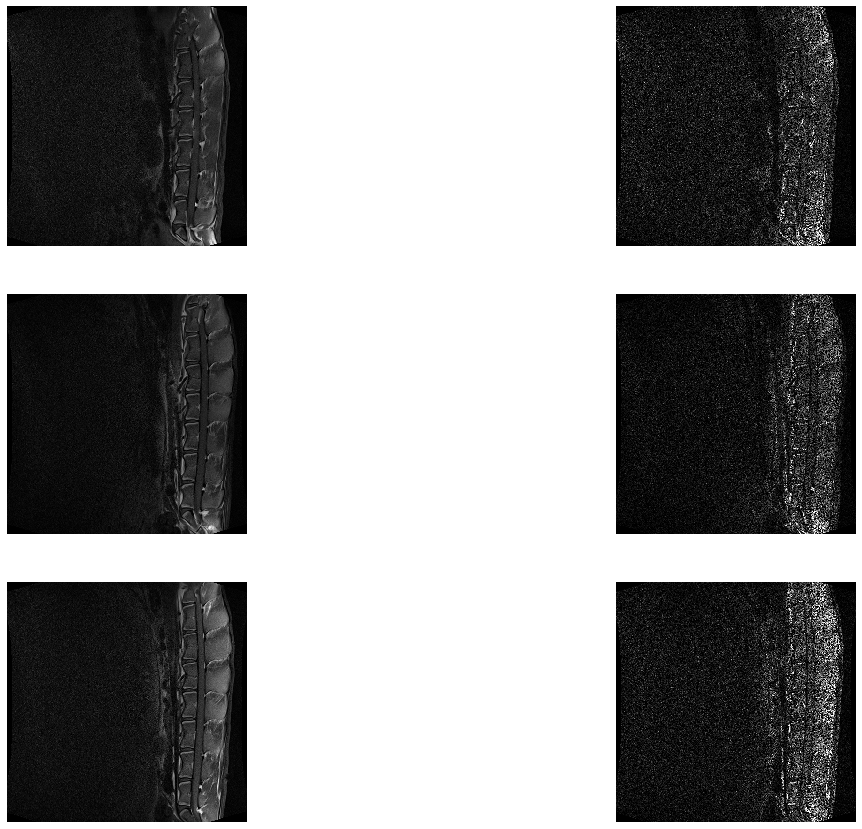

(73, 512, 512, 1) float32 0.09404996 1.0 0.0
(73, 512, 512, 1) float32 0.08837768 1.0 0.0


In [5]:
if __name__ == '__main__':
    N_show = 3

    plt.figure(figsize = (10*2,5*N_show))
    for i in range(N_show):
        plt.subplot(N_show,2,2*i+1)
        plt.imshow(ims_T1[i].squeeze(),cmap='gray')
        plt.axis('off')

        plt.subplot(N_show,2,2*i+2)
        plt.imshow(ims_T1_sn[i].squeeze(),cmap='gray')
        plt.axis('off')
    plt.show()

    print(ims_T1_sn.shape, ims_T1_sn.dtype, ims_T1_sn.mean(), ims_T1_sn.max(), ims_T1_sn.min())
    print(ims_T1.shape, ims_T1.dtype, ims_T1.mean(), ims_T1.max(), ims_T1.min())

# ImageNet的数据

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib
import sys

import skimage.io as io
import tensorflow as tf

from utils import read_imagenet_data, add_noise, normalize

In [4]:
# reload(sys)
# sys.setdefaultencoding('utf8')

def store_raw_images(link, save_path, im_size = (128, 128)):
    images_link = link
    image_urls = urllib.request.urlopen(images_link).read().decode()
    
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    pic_num = 1
    for i in image_urls.split('\n'):
        try:
            if not os.path.exists(os.path.join(save_path, str(pic_num)+".jpg")):
                print(pic_num, i)
                urllib.request.urlretrieve(i, os.path.join(save_path, str(pic_num)+".jpg"))
                img = cv2.imread(os.path.join(save_path, str(pic_num)+".jpg"), cv2.IMREAD_GRAYSCALE)
                # should be larger than samples / pos pic (so we can place our image on it)
                resized_image = cv2.resize(img, im_size)
                cv2.imwrite(os.path.join(save_path, str(pic_num)+".jpg"), resized_image)
            pic_num += 1

        except Exception as e:
                print(str(e))  
    print("Total", pic_num, "images loaded successfully")

In [ ]:
link = r'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n01317541'
save_path = r'./images/animals'
store_raw_images(link, save_path)

1277 http://static.flickr.com/3046/3030268809_811f0465a4.jpg
1278 http://farm4.static.flickr.com/3597/3282750677_987fe05d28.jpg
1279 http://static.flickr.com/37/77740535_739bb39bae.jpg
HTTP Error 404: Not Found
1279 http://a0.att.hudong.com/49/73/01100000000019114587373911049.jpg
1280 http://static.flickr.com/3133/2745001378_7f60897f09.jpg
1281 http://comps.fotosearch.com/comp/UNZ/UNZ807/canine-russell-close_~u24118908.jpg
1282 http://images.inmagine.com/img/photoalto/paa029/paa029000021.jpg
<urlopen error [Errno 11001] getaddrinfo failed>
1282 http://farm1.static.flickr.com/108/288022543_9f65e84fbf.jpg
HTTP Error 404: Not Found
1282 http://static.flickr.com/130/333112837_81eaa9fb3a.jpg
1283 http://static.flickr.com/1006/1325011411_4dd8e1985d.jpg
1284 http://farm1.static.flickr.com/18/24030559_f05005d0c4.jpg
HTTP Error 410: Gone
1284 http://www.kupet.cn/user/1599/upload/07-04-22/1177212704_pic.jpg
<urlopen error [Errno 11001] getaddrinfo failed>
1284 http://farm4.static.flickr.com/3223

In [5]:
link = r'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n00017222'
save_path = r'./images/plants'
store_raw_images(link, save_path)

1 http://farm3.static.flickr.com/2547/3980627577_087c199c7d.jpg
2 http://farm3.static.flickr.com/2569/4092262572_b76cb9158a.jpg
HTTP Error 410: Gone
2 http://farm4.static.flickr.com/3170/3088985331_546087827a.jpg
HTTP Error 410: Gone
2 http://farm4.static.flickr.com/3228/2827247993_cb39969c64.jpg
HTTP Error 410: Gone
2 http://farm3.static.flickr.com/2176/2163286527_3402a3409f.jpg
3 http://farm4.static.flickr.com/3175/2758910973_3f8c459b33.jpg
4 http://farm3.static.flickr.com/2550/4223567784_8463f643f3.jpg
5 http://farm2.static.flickr.com/1093/1418895091_cce9e57475.jpg
6 http://farm4.static.flickr.com/3021/3086676034_5d5838247f.jpg
HTTP Error 410: Gone
6 http://farm4.static.flickr.com/3271/3086177261_82ff323bce.jpg
7 http://farm4.static.flickr.com/3163/3060465326_88ddbdd888.jpg
8 http://farm4.static.flickr.com/3232/3099073588_867d0e05ba.jpg
9 http://farm4.static.flickr.com/3515/3246295849_e8cb38748a.jpg
HTTP Error 410: Gone
9 http://farm1.static.flickr.com/160/404748410_95c84be084.jpg
1

55 http://farm3.static.flickr.com/2400/2357975761_796b437d5e.jpg
HTTP Error 410: Gone
55 http://farm4.static.flickr.com/3527/3225257367_3e9d5252d1.jpg
HTTP Error 404: Not Found
55 http://farm4.static.flickr.com/3653/3559453910_049e2d867a.jpg
HTTP Error 410: Gone
55 http://farm4.static.flickr.com/3489/3268891003_d83d53b258.jpg
HTTP Error 410: Gone
55 http://farm1.static.flickr.com/47/130240689_405e7df6ba.jpg
HTTP Error 410: Gone
55 http://farm4.static.flickr.com/3252/3115004711_d412583ce9.jpg
HTTP Error 410: Gone
55 http://farm4.static.flickr.com/3012/3058113689_d9e51d3e2d.jpg
HTTP Error 410: Gone
55 http://farm4.static.flickr.com/3240/3049206767_686d0e2b29.jpg
HTTP Error 410: Gone
55 http://farm4.static.flickr.com/3113/3098742422_dc7d9cf4ed.jpg
HTTP Error 410: Gone
55 http://farm4.static.flickr.com/3231/2880295971_e4c1513828.jpg
56 http://farm4.static.flickr.com/3184/2773012079_969b0a9570.jpg
HTTP Error 410: Gone
56 http://farm4.static.flickr.com/3613/3369492313_e465771361.jpg
HTTP Err

HTTP Error 410: Gone
103 http://farm4.static.flickr.com/3332/3249492895_a5f495c864.jpg
104 http://farm1.static.flickr.com/50/142642888_3b53ad98ae.jpg
HTTP Error 410: Gone
104 http://farm4.static.flickr.com/3069/2625693124_690b9bc9b9.jpg
105 http://farm4.static.flickr.com/3377/3532392164_aa246b3b6a.jpg
HTTP Error 410: Gone
105 http://farm3.static.flickr.com/2503/3908674031_616fc9028b.jpg
106 http://farm1.static.flickr.com/161/374655806_b9180c9eb7.jpg
107 http://farm3.static.flickr.com/2663/3972471109_93914b35b6.jpg
108 http://farm4.static.flickr.com/3602/3347886598_00c7a7268a.jpg
109 http://farm1.static.flickr.com/183/464421738_e7d7cac226.jpg
110 http://farm4.static.flickr.com/3161/2781393886_8d4123144c.jpg
111 http://farm4.static.flickr.com/3472/3964872325_22c05c7c54.jpg
112 http://farm4.static.flickr.com/3060/2880199157_b00c840bba.jpg
113 http://farm4.static.flickr.com/3145/3099491093_eced733905.jpg
114 http://farm3.static.flickr.com/2169/2419133060_b1b64130bb.jpg
115 http://farm4.sta

HTTP Error 404: Not Found
161 http://farm4.static.flickr.com/3013/2477812660_0343f9cc08.jpg
HTTP Error 410: Gone
161 http://farm1.static.flickr.com/170/466479397_6feb74c7c5.jpg
HTTP Error 404: Not Found
161 http://farm3.static.flickr.com/2324/2381218218_841a4023f8.jpg
162 http://farm3.static.flickr.com/2474/3908932903_c9a8032fb3.jpg
163 http://farm4.static.flickr.com/3366/3442038980_5c8c7f91e5.jpg
HTTP Error 410: Gone
163 http://farm4.static.flickr.com/3591/3489403770_09242ccf89.jpg
HTTP Error 410: Gone
163 http://farm4.static.flickr.com/3072/3084447697_5e56d08084.jpg
HTTP Error 410: Gone
163 http://farm4.static.flickr.com/3231/2820006250_180f15f65f.jpg
164 http://farm4.static.flickr.com/3080/3202236258_ba2bc161c3.jpg
165 http://farm4.static.flickr.com/3473/3820245528_971ef47393.jpg
HTTP Error 410: Gone
165 http://farm4.static.flickr.com/3114/3099491689_479537b1a7.jpg
HTTP Error 410: Gone
165 http://farm4.static.flickr.com/3497/3975302390_a7c5eb9aaa.jpg
166 http://farm4.static.flickr.c

230 http://farm4.static.flickr.com/3222/2418513055_555887fae7.jpg
231 http://farm4.static.flickr.com/3067/3065694191_77bd38f594.jpg
HTTP Error 410: Gone
231 http://farm4.static.flickr.com/3649/3534679647_3353f4ba10.jpg
HTTP Error 410: Gone
231 http://farm4.static.flickr.com/3579/3352370988_26ed77f136.jpg
HTTP Error 410: Gone
231 http://farm4.static.flickr.com/3003/2880322825_abca4f1fbb.jpg
232 http://farm1.static.flickr.com/153/336614283_c4556ef14c.jpg
233 http://farm4.static.flickr.com/3564/3396008897_73ec449077.jpg
HTTP Error 410: Gone
233 http://farm3.static.flickr.com/2450/3972516413_43858bca39.jpg
234 http://farm4.static.flickr.com/3634/3305624721_0a1bebcb46.jpg
235 http://farm3.static.flickr.com/2202/2449491160_2e91aa7482.jpg
236 http://farm2.static.flickr.com/1357/1419779120_73aa69acf0.jpg
237 http://farm3.static.flickr.com/2578/3713766555_90825cddea.jpg
HTTP Error 410: Gone
237 http://farm3.static.flickr.com/2074/2117840088_33551b0c87.jpg
238 http://farm2.static.flickr.com/1268

288 http://farm4.static.flickr.com/3524/3259989307_07caf9e64d.jpg
HTTP Error 410: Gone
288 http://farm4.static.flickr.com/3555/3513525134_8857d9a1f2.jpg
HTTP Error 410: Gone
288 http://farm3.static.flickr.com/2162/3533881068_ca96cd3c65.jpg
289 http://farm1.static.flickr.com/132/342262576_5b519a6e56.jpg
290 http://farm4.static.flickr.com/3091/3914091652_fede33fa65.jpg
291 http://farm4.static.flickr.com/3414/3576463675_54d1b883f6.jpg
HTTP Error 410: Gone
291 http://farm1.static.flickr.com/126/342249649_1f446bf5a5.jpg
292 http://farm4.static.flickr.com/3643/3550827007_b4245ff0d3.jpg
HTTP Error 404: Not Found
292 http://farm4.static.flickr.com/3318/3487663450_2dfe5b2372.jpg
293 http://farm3.static.flickr.com/2517/3782668708_4a387bf604.jpg
HTTP Error 410: Gone
293 http://farm3.static.flickr.com/2474/3635300045_b321fefbff.jpg
294 http://farm3.static.flickr.com/2153/2273666710_a8ffd13009.jpg
295 http://farm4.static.flickr.com/3453/3236058193_62d877fc40.jpg
HTTP Error 410: Gone
295 http://farm

329 http://farm4.static.flickr.com/3359/3514994061_9ce25b065b.jpg
HTTP Error 410: Gone
329 http://farm4.static.flickr.com/3594/3523841956_d9af41f8b6.jpg
HTTP Error 410: Gone
329 http://farm4.static.flickr.com/3608/3498805449_4420cd0eff.jpg
HTTP Error 404: Not Found
329 http://farm1.static.flickr.com/188/447091203_e356656eb3.jpg
330 http://farm2.static.flickr.com/1321/743446392_bedd253424.jpg
HTTP Error 404: Not Found
330 http://farm4.static.flickr.com/3448/3269113232_4803ba57fc.jpg
HTTP Error 410: Gone
330 http://farm3.static.flickr.com/2473/3802289090_ddc908903a.jpg
HTTP Error 410: Gone
330 http://farm4.static.flickr.com/3656/3314764744_531ec8cdf9.jpg
HTTP Error 410: Gone
330 http://farm4.static.flickr.com/3415/3555739330_b90ee50f51.jpg
331 http://www.swcoloradowildflowers.com/Pink%20Enlarged%20Photos/3cabu2.jpg
332 http://farm4.static.flickr.com/3136/3107172870_98010aa570.jpg
HTTP Error 410: Gone
332 http://farm4.static.flickr.com/3640/3508451632_15aa597d2c.jpg
333 http://farm4.stati

374 http://farm3.static.flickr.com/2652/4053529132_f9eb79d787.jpg
375 http://farm4.static.flickr.com/3514/3982995855_e37d120315.jpg
HTTP Error 410: Gone
375 http://farm3.static.flickr.com/2152/2332156144_a01e22f568.jpg
HTTP Error 410: Gone
375 http://farm4.static.flickr.com/3658/3500303292_6f262da614.jpg
HTTP Error 410: Gone
375 http://farm4.static.flickr.com/3060/3250031214_a3964c6b16.jpg
376 http://farm4.static.flickr.com/3411/3441273372_46477fbbb1.jpg
377 http://farm4.static.flickr.com/3384/3555726076_599939983c.jpg
378 http://farm4.static.flickr.com/3553/3563819155_65e0ea00fd.jpg
HTTP Error 410: Gone
378 http://farm3.static.flickr.com/2494/4104865779_320b2ed318.jpg
HTTP Error 404: Not Found
378 http://farm5.static.flickr.com/4001/4166222432_a0569eae52.jpg
379 http://farm3.static.flickr.com/2119/2426647572_5c8838721b.jpg
380 http://farm4.static.flickr.com/3272/3056656315_8991c3ba88.jpg
381 http://farm3.static.flickr.com/2073/2115741811_10f8c48633.jpg
382 http://farm1.static.flickr.c

HTTP Error 404: Not Found
431 http://farm4.static.flickr.com/3288/3099617531_ef1cd517bd.jpg
432 http://farm4.static.flickr.com/3516/3202227384_1a67a28709.jpg
433 http://farm4.static.flickr.com/3204/3099052432_71f379640f.jpg
434 http://farm1.static.flickr.com/33/91993703_f0daae5bbd.jpg
435 http://farm4.static.flickr.com/3211/2706536014_369e8e07e2.jpg
HTTP Error 404: Not Found
435 http://farm4.static.flickr.com/3631/3437145441_b6a45fd0d9.jpg
436 http://farm3.static.flickr.com/2428/3963383507_7d185385a1.jpg
HTTP Error 410: Gone
436 http://farm3.static.flickr.com/2050/2471135132_8a0b9dbc96.jpg
437 http://farm4.static.flickr.com/3535/3821254088_2f5cf818b8.jpg
438 http://farm3.static.flickr.com/2071/2348264680_288b57bbe5.jpg
439 http://farm4.static.flickr.com/3402/3268967409_7272a1923e.jpg
HTTP Error 410: Gone
439 http://farm3.static.flickr.com/2264/2117037241_548fd7804b.jpg
440 http://farm4.static.flickr.com/3158/3087035702_7e7dddfe3a.jpg
HTTP Error 410: Gone
440 http://farm4.static.flickr.

HTTP Error 410: Gone
491 http://farm4.static.flickr.com/3328/3529722278_e96e4ed4c1.jpg
HTTP Error 410: Gone
491 http://farm4.static.flickr.com/3031/3086048297_56e8ffc8a8.jpg
HTTP Error 410: Gone
491 http://farm1.static.flickr.com/133/337549422_1151b9b35d.jpg
492 http://farm1.static.flickr.com/164/336530766_fbd5f45262.jpg
493 http://farm4.static.flickr.com/3114/2564234403_09370dce30.jpg
HTTP Error 410: Gone
493 http://farm4.static.flickr.com/3357/3605209832_e3ea8f12b8.jpg
HTTP Error 410: Gone
493 http://farm4.static.flickr.com/3659/3341156792_571a9e6a9e.jpg
HTTP Error 404: Not Found
493 http://farm4.static.flickr.com/3255/2470294003_451bf5783f.jpg
494 http://farm4.static.flickr.com/3263/2728741835_8e1691e86f.jpg
495 http://farm3.static.flickr.com/2348/3529329792_1cb2195fd3.jpg
HTTP Error 410: Gone
495 http://farm5.static.flickr.com/4034/4334450098_e6cdcc9697.jpg
HTTP Error 410: Gone
495 http://farm3.static.flickr.com/2044/2542037276_7af6c82cfd.jpg
496 http://farm3.static.flickr.com/2424

HTTP Error 404: Not Found
539 http://farm4.static.flickr.com/3603/3503908520_1955f7025d.jpg
HTTP Error 410: Gone
539 http://farm4.static.flickr.com/3653/3568670249_407c3312a8.jpg
540 http://farm4.static.flickr.com/3157/3283969975_938623d1ae.jpg
541 http://farm3.static.flickr.com/2264/2445632761_444a765d4b.jpg
HTTP Error 404: Not Found
541 http://farm1.static.flickr.com/160/342273401_853c1f470b.jpg
542 http://farm4.static.flickr.com/3065/2694096317_068c5663ca.jpg
543 http://farm4.static.flickr.com/3602/3548376259_fc15a009ac.jpg
544 http://farm4.static.flickr.com/3617/3578555284_308cf756ea.jpg
545 http://farm3.static.flickr.com/2559/3834087028_f710ed3837.jpg
546 http://farm1.static.flickr.com/29/65475020_3045268c66.jpg
547 http://farm4.static.flickr.com/3007/3093518698_d757b7d58d.jpg
HTTP Error 410: Gone
547 http://farm1.static.flickr.com/180/373232551_1ffa6170da.jpg
548 http://farm4.static.flickr.com/3388/3554909995_f38df72479.jpg
549 http://farm1.static.flickr.com/108/311060700_ac4fcaa

HTTP Error 410: Gone
603 http://farm3.static.flickr.com/2181/2330949511_5d15718d2a.jpg
604 http://farm2.static.flickr.com/1085/741895858_60b89334d7.jpg
605 http://farm3.static.flickr.com/2673/3954640504_3ce7d5a529.jpg
HTTP Error 410: Gone
605 http://farm3.static.flickr.com/2262/2467579015_3758010be7.jpg
606 http://farm2.static.flickr.com/1144/896939678_cb5aac5d5a.jpg
HTTP Error 404: Not Found
606 http://farm4.static.flickr.com/3006/2881175232_8f9405191a.jpg
607 http://farm1.static.flickr.com/161/438778468_4e7c6f5677.jpg
608 http://farm4.static.flickr.com/3096/3550828347_a9bab12ec7.jpg
HTTP Error 404: Not Found
608 http://farm3.static.flickr.com/2064/2236176879_4953d81c3d.jpg
HTTP Error 404: Not Found
608 http://farm3.static.flickr.com/2333/2365685753_e8fe30c464.jpg
609 http://reddeparquesnacionales.mma.es/parques/ordesa/flora/img/3.jpg
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1076)>
609 http://farm3.static

In [6]:
link = r'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n00021939'
save_path = r'./images/artifacts'
store_raw_images(link, save_path)

1 http://farm4.static.flickr.com/3332/3276572160_c3f1d4acf9.jpg
2 http://www.gift12345.com/UserDocument/tongyizhai/Picture/200782414840.jpg
HTTP Error 404: Not Found
2 http://farm4.static.flickr.com/3232/3116901494_4b2c1148c0.jpg
3 http://www.mrmodern.com/var/ezwebin_site/storage/fckeditor/Image/U2596P1T1D18801634F21DT20091010130910.jpg
HTTP Error 404: Not Found
3 http://farm4.static.flickr.com/3277/2869155661_73072b83f6.jpg
4 http://i02.c.aliimg.com/img/offer2/2010/463/568/321463568_2469d925cc486f9adba4c1070170268a.jpg
5 http://farm4.static.flickr.com/3469/3275787043_e7650a6e1f.jpg
6 http://farm3.static.flickr.com/2726/4329011039_b92a95dc5a.jpg
7 http://www.presstv.ir/photo/20081005/ebrahimpour20081005195101171.jpg
HTTP Error 404: Not Found
7 http://img03.taobaocdn.com/bao/uploaded/i3/T1Rv4bXjFmdcESsFM._111156.jpg
8 http://farm4.static.flickr.com/3384/3274313606_3a0d6f758c.jpg
9 http://blogfile.ifeng.com/uploadfiles/blog_attachment/0801/43/1219943_b4cf285e2a6ba2e041f417edaeff45f0.jpg


62 http://farm3.static.flickr.com/2640/3974099029_10270ba46d.jpg
HTTP Error 404: Not Found
62 http://image.cn.made-in-china.com/4f0j01oBptQNZqhzuS/柳编工艺品.jpg
'ascii' codec can't encode characters in position 24-28: ordinal not in range(128)
62 http://i01.c.aliimg.com/news/upload/5000180/news/2008/8/18/400x314_11bd5062b57.jpg
63 http://image.big5.made-in-china.com/2f0j01TvYERBeJauqW/运势如虹工艺品(GX-1068-5A)－1.jpg
'ascii' codec can't encode characters in position 24-30: ordinal not in range(128)
63 http://4.bp.blogspot.com/_tTkzwOnPPY4/SUTkSGm91QI/AAAAAAAASCs/2MuwmGJRhUQ/s400/rn+木雕+藝術品4.jpg
'ascii' codec can't encode characters in position 62-63: ordinal not in range(128)
63 http://i05.c.aliimg.com/blog/quan/c/h/a/o/9c628ae0bfb4ade025918d0a30910db8_orig.jpg
64 http://i35.tinypic.com/hvs944.jpg
65 http://blog.vsharing.com/Uploads/UserDirs/5/1737/694686/木雕金蟾.jpg
'ascii' codec can't encode characters in position 36-39: ordinal not in range(128)
65 http://farm1.static.flickr.com/139/348552024_3544

99 http://img.hc360.com/gift/info/images/200907/200907301326377691.jpg
100 http://img.lotour.com/test/vocationjs/200912/img419918.jpg
HTTP Error 404: Not Found
100 http://farm2.static.flickr.com/1019/644566147_af86c8a2a8.jpg
101 http://farm3.static.flickr.com/2454/3649131113_961f43fea5.jpg
102 http://farm4.static.flickr.com/3153/2869982534_7c36a71696.jpg
103 http://farm2.static.flickr.com/1092/644571899_09ceec72ce.jpg
104 http://farm3.static.flickr.com/2725/4090520140_f1ae17568b.jpg
105 http://farm5.static.flickr.com/4029/4502046975_3b559558e0.jpg
106 http://farm4.static.flickr.com/3486/4082327157_0fa829310f.jpg
107 http://farm5.static.flickr.com/4016/4241475343_1cddc59ab0.jpg
108 http://farm4.static.flickr.com/3480/3953306232_59e106e04c.jpg
109 http://img25.artxun.com/sdd/oldimg/7052/7052b128dbc4826a49f18caac6f8fa85_1.jpg
HTTP Error 404: Not Found
109 http://image.big5.made-in-china.com/2f0j01aeStuKJAEUbV/玉石工艺品－平安吉祥+（JYY-B0001）.jpg
'ascii' codec can't encode characters in position 24-

171 http://www.thejakartaglobe.com/media/images/large/20091214204648974.jpg
OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

172 http://image.big5.made-in-china.com/2f0j01qCuQgDFUIGzH/仿古陶瓷工艺品－唐三彩披鬃马+（W-F-M010）.jpg
'ascii' codec can't encode characters in position 24-37: ordinal not in range(128)
172 http://farm3.static.flickr.com/2421/3611303722_d1b5fa7592.jpg
HTTP Error 404: Not Found
172 http://farm4.static.flickr.com/3427/3358688188_27318349bb.jpg
173 http://image.cn.made-in-china.com/2f0j01gvBadNUKnfuM/华尔街牛-金属工艺品（HUA-2008-01）.jpg
'ascii' codec can't encode characters in position 24-27: ordinal not in range(128)
173 http://farm3.static.flickr.com/2540/3974078899_c4097de53f.jpg
HTTP Error 404: Not Found
173 http://farm3.static.flickr.com/2029/2532959193_208a3ceba2.jpg
174 http://farm3.static.flickr.com/2728/4121901807_d03f417fb9.jpg
175 http://farm4.static.flickr.com/3598/361653

HTTP Error 404: Not Found
237 http://farm3.static.flickr.com/2002/2515325617_c6d726d432.jpg
238 http://farm4.static.flickr.com/3182/2340259396_0548cbe76e.jpg
239 http://farm4.static.flickr.com/3302/3275278997_4d1c0ed953.jpg
240 http://china.eb80.com/member/product/150815.jpg
HTTP Error 404: Not Found
240 http://www.preservationvirginia.org/rediscovery/image/gartfact.jpg
HTTP Error 403: Forbidden
240 http://image.cn.made-in-china.com/2f0j01yChajTUIauqV/树脂工艺品+(摆件)+(NPS002).jpg
'ascii' codec can't encode characters in position 24-28: ordinal not in range(128)
240 http://img15.artxun.com/sdc/oldimg/a8b0/a8b0dfa7bcc1910f88c4bc65e3f7f12d_1.jpg
HTTP Error 404: Not Found
240 http://farm4.static.flickr.com/3433/3270255003_6b096596ce.jpg
241 http://farm3.static.flickr.com/2598/3974052189_38bbb3a7a8.jpg
HTTP Error 404: Not Found
241 http://farm5.static.flickr.com/4025/4276092834_98dc0ae6c2.jpg
242 http://cn.ec51.com/uimages/z/zh/zhangyue66/max_1195547508.jpg
HTTP Error 404: Not Found
242 http://f

HTTP Error 404: Not Found
300 http://farm4.static.flickr.com/3560/3341550730_9d1e541cb8.jpg
301 http://farm4.static.flickr.com/3425/3274154979_d6252d82d5.jpg
HTTP Error 410: Gone
301 http://farm3.static.flickr.com/2526/3974032287_590a48d9c3.jpg
HTTP Error 404: Not Found
301 http://farm3.static.flickr.com/2021/2207723167_ec4be98a76.jpg
302 http://www2.bishopmuseum.org/ethnologydb/250/1982.033.003.jpg
303 http://img15.artxun.com/sdd/oldimg/c7b9/c7b9868af596dd2130ccb07629280a0f_1.jpg
HTTP Error 404: Not Found
303 http://farm3.static.flickr.com/2181/2533764324_c9e3d7e172.jpg
304 http://files.abovetopsecret.com/images/member/5c27eba35757.jpg
305 http://farm4.static.flickr.com/3332/3277844020_098a035478.jpg
306 http://farm1.static.flickr.com/17/21179547_10a6968e10.jpg
307 http://farm4.static.flickr.com/3615/3396352762_f4972f54d8.jpg
308 http://www.wegwijslezer.nl/Temp/SO_250_big.jpeg
<urlopen error [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。>
308 http://farm4.static.flickr.com/3465/

359 http://farm4.static.flickr.com/3130/2657817171_2f8eb2c491.jpg
360 http://img15.artxun.com/sdd/oldimg/b783/b783de2f79d2eb1c3202802f7bcf6764_1.jpg
HTTP Error 404: Not Found
360 http://www.yiqiyou.com/upload/20061129/1164787696635.jpg
HTTP Error 404: Not Found
360 http://farm3.static.flickr.com/2226/2533765830_a107f5e185.jpg
361 http://farm4.static.flickr.com/3597/3510281658_f2d1d1fe4c.jpg
362 http://www.my7475.com/wp-content/uploads/2008/10/my747508100605.jpg
HTTP Error 404: Not Found
362 http://farm4.static.flickr.com/3238/2340258124_7a996df891.jpg
363 http://indiagiftsportal.giftsdb.com/images/proimages/giftsm344.jpg
<urlopen error [Errno 11001] getaddrinfo failed>
363 http://farm3.static.flickr.com/2068/2270860719_0645c79812.jpg
364 http://farm3.static.flickr.com/2199/1919792726_32ea1b3df3.jpg
365 http://img04.taobaocdn.com/bao/uploaded/i4/T1AFVdXbBBGoBJQGja_120122.jpg
366 http://image.big5.made-in-china.com/2f0j01YMjtThEosgbs/核桃工艺品专用胶水、粘接剂、胶粘剂、粘结剂.jpg
'ascii' codec can't encode c

HTTP Error 404: Not Found
410 http://img.cn.china.cn/0/0,0,201,15677,800,1067,2d4cf3fd.jpg
HTTP Error 404: Not Found
410 http://farm4.static.flickr.com/3020/2708904931_e8e3f249c4.jpg
411 http://image.phototime.cn/image1/middle/6829/62/C37289731.jpg
<urlopen error [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。>
411 http://farm4.static.flickr.com/3285/2899221417_9601ea29b9.jpg
412 http://myzone.yidaba.com/shop/upload/20100210/021dd593fff3c8dcdbbad31db0eda5d1.JPG
HTTP Error 404: Not Found
412 http://farm3.static.flickr.com/2089/2254423068_1da7fd1c49.jpg
413 http://farm4.static.flickr.com/3462/3276629580_e1b188c5fd.jpg
414 http://www.craftschina.net/main/photo1/csjrds1-9202332.jpg
HTTP Error 403: Forbidden
414 http://pic.58.com/Images/postimg08/big/2009-12-05/F092745648101415.jpg
415 http://www.brookesrestorations.com/images/gallery9b-about.jpg
HTTP Error 404: Not Found
415 http://img08.taobaocdn.com/bao/uploaded/i8/T1FjNjXfSttJPGWnza_092413.jpg
416 http://img07.taobaocdn.com/bao/upl

456 http://farm4.static.flickr.com/3609/3510304508_f331cbfa18.jpg
457 http://pic.58.com/Images/postimg08/big/2009-07-10/F2009071012451211171844.jpg
458 http://image.cn.made-in-china.com/2f0j01hvIawcGZAUkO/树脂工艺品两只天鹅.jpg
'ascii' codec can't encode characters in position 24-32: ordinal not in range(128)
458 http://farm3.static.flickr.com/2778/4368367777_4da15327a3.jpg
459 http://farm3.static.flickr.com/2269/2253625975_0a62cf1492.jpg
460 http://farm3.static.flickr.com/2644/4173626690_34aff6799c.jpg
461 http://farm4.static.flickr.com/3522/4014379544_af46a6dc9c.jpg
HTTP Error 404: Not Found
461 http://qiye.sqdmz.gov.cn/Vipcom/shybwgy/200973102841.jpg
<urlopen error [Errno 11001] getaddrinfo failed>
461 http://farm5.static.flickr.com/4065/4507482529_496365c1f5.jpg
462 http://farm4.static.flickr.com/3303/3510264832_5d7b9e874f.jpg
463 http://farm4.static.flickr.com/3327/3276138640_c558edb4b0.jpg
464 http://www.gift12345.com/UserDocument/lyhlzylll/Picture/2007822151324.jpg
HTTP Error 404: Not Fo

524 http://image.cn.made-in-china.com/2f0j01dvztrSqgbYkB/陶器工艺品.jpg
'ascii' codec can't encode characters in position 24-28: ordinal not in range(128)
524 http://farm4.static.flickr.com/3434/3278097162_b1b01113c2.jpg
525 http://farm4.static.flickr.com/3291/3069561157_bd120d7b49.jpg
526 http://farm3.static.flickr.com/2231/1897887700_e6c1ce609a.jpg
527 http://farm3.static.flickr.com/2532/4200104755_d44e6df2d3.jpg
HTTP Error 404: Not Found
527 http://farm4.static.flickr.com/3174/3082463796_2a5c7db6c8.jpg
528 http://farm4.static.flickr.com/3350/3277907266_034a436616.jpg
529 http://img1.2095114.com/suppliers/product_cn//2009/10/17/77/13705777_1.jpg
<urlopen error [Errno 11002] getaddrinfo failed>
529 http://farm4.static.flickr.com/3249/3124216385_5263d7d7d5.jpg
HTTP Error 404: Not Found
529 http://farm1.static.flickr.com/40/125216709_c538763af3.jpg
HTTP Error 410: Gone
529 http://farm2.static.flickr.com/1133/1007320202_72beaf0df0.jpg
530 http://farm4.static.flickr.com/3464/3276630846_15ed8c5

585 http://farm1.static.flickr.com/124/323153141_51c1b2a585.jpg
586 http://farm3.static.flickr.com/2161/2480942578_661244d49e.jpg
587 http://farm3.static.flickr.com/2756/4441985909_1fd53ffa94.jpg
588 http://farm3.static.flickr.com/2410/2064519453_3c00cf64dc.jpg
589 http://www.arkeodok.com/Nya%20filer/Birka1599.4object.jpg
HTTP Error 403: Forbidden
589 http://farm3.static.flickr.com/2288/2054020285_b4de132241.jpg
HTTP Error 410: Gone
589 http://farm4.static.flickr.com/3331/3268607467_18a43d62c9.jpg
590 http://farm4.static.flickr.com/3454/3974880898_0679914cea.jpg
HTTP Error 404: Not Found
590 http://farm5.static.flickr.com/4020/4447800230_3216475899.jpg
HTTP Error 404: Not Found
590 http://www.baronet4tibet.com/images/artifacts_statuary/sngl_drje/sngl_drj_main1_gallery.JPG
591 http://farm3.static.flickr.com/2151/2404965459_2d931bcbdf.jpg
592 http://farm4.static.flickr.com/3628/3323886822_246df5ec5b.jpg
593 http://farm4.static.flickr.com/3127/2856935886_afef18a089.jpg
594 http://farm3.st

662 http://farm4.static.flickr.com/3312/3274874805_d097cdcd63.jpg
663 http://farm4.static.flickr.com/3324/3509458063_9229c43b34.jpg
664 http://farm3.static.flickr.com/2541/4033975635_375dec6ab8.jpg
HTTP Error 404: Not Found
664 http://farm2.static.flickr.com/1175/996178227_ba8679ebb2.jpg
HTTP Error 410: Gone
664 http://janny.vermaat.name/log/wp-content/uploads/2009/06/imgp4235.jpg
665 http://www.ddbstock.dns2go.com/comps/olmecartifacts/olmecartifacts035c.jpg
<urlopen error [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。>
665 http://farm4.static.flickr.com/3099/2856043649_50da9dbf89.jpg
666 http://www.jndcgy.com/pic/5.jpg
HTTP Error 404: Not Found
666 http://farm3.static.flickr.com/2714/4510966852_71406ef4c0.jpg
667 http://farm4.static.flickr.com/3445/3815961506_02993cd077.jpg
HTTP Error 410: Gone
667 http://farm4.static.flickr.com/3384/3276598738_1dfae2a724.jpg
668 http://farm4.static.flickr.com/3583/3536684879_14e383a623.jpg
669 http://www.anthroposgallery.com/gallery/images/Coli

726 http://theartblog.org/blog/wp-content/uploaded/tnoe.jpg
HTTP Error 403: Forbidden
726 http://pic.58.com/Images/postimg08/big/2009-09-29/F112442859984500.jpg
727 http://farm3.static.flickr.com/2161/2349059179_8a26545777.jpg
728 http://farm5.static.flickr.com/4012/4459345017_205d81d739.jpg
729 http://www.stockphotopro.com/photo-thumbs-2/stockphotopro_8440042YJX_no_title.jpg
HTTP Error 403: Forbidden
729 http://farm4.static.flickr.com/3048/3767130636_4b1af0bda2.jpg
730 http://picsj.qu114.com/userpic/tmp/image/2010-02-02/20100202023241890.jpg
<urlopen error [Errno 11001] getaddrinfo failed>
730 http://farm2.static.flickr.com/1171/543303842_7fac2ccbd6.jpg
731 http://farm2.static.flickr.com/1032/1425344860_f7d3b05da7.jpg
732 http://images.kapaza.com/photos/9900000/9988633.jpg
HTTP Error 404: Not Found
732 http://farm4.static.flickr.com/3365/3269433988_ccd039b331.jpg
733 http://www.civilization.ca/cmc/exhibitions/hist/frobisher/images/freng05a.jpg
<urlopen error [SSL: CERTIFICATE_VERIFY_F

794 http://farm1.static.flickr.com/42/110450649_1d4669c4ee.jpg
795 http://farm4.static.flickr.com/3417/3270916044_63f1feac90.jpg
796 http://i3.sinaimg.cn/travel/ul/2009/0715/U3332P704DT20090715161645.jpg
797 http://farm1.static.flickr.com/93/230157362_78f9e7e71d.jpg
798 http://image.cn.made-in-china.com/2f0j01qMHTdEYaOUoy/树脂工艺品猪兔呈祥.jpg
'ascii' codec can't encode characters in position 24-32: ordinal not in range(128)
798 http://farm4.static.flickr.com/3206/2994451395_645d35ed66.jpg
HTTP Error 404: Not Found
798 http://img01.taobaocdn.com/bao/uploaded/i1/T1NBFfXo3UWtL8Vwg1_040930.jpg
799 http://farm4.static.flickr.com/3415/3277776052_13dfacb3c4.jpg
800 http://image.poco.cn/mypoco/myphoto/20071101/13/4026777920071101135058768_000_640.jpg
HTTP Error 404: Not Found
800 http://farm4.static.flickr.com/3163/2630613200_fd846987a5.jpg
801 
unknown url type: ''
801 
unknown url type: ''
Total 801 images loaded successfully


In [4]:
root_path = r'../images'
ims = read_imagenet_data(root_path)
ims = normalize(ims[:,:,:,np.newaxis])
print(ims.shape, ims.dtype, ims.max(), ims.min())

(2714, 128, 128, 1) float32 1.0 0.0


In [24]:
ims_noise = add_noise(ims, mean=0, var=1e-3, n_type='gaussian')
#ims_noise = normalize(ims_noise)
print(ims_noise.shape, ims_noise.dtype, ims_noise.max(), ims_noise.min())

(2714, 128, 128, 1) float32 1.1650723 -0.13727385


In [25]:
def error(x1, x2, mode='mse'):
    if mode == 'mse':
        return np.mean(np.square(x1-x2))
    elif mode == 'mae':
        return np.mean(np.abs(x1-x2))
    return

def psnr(x1, x2):
    return tf.reduce_mean(tf.image.psnr(x1, x2, max_val=1)).numpy()

print(error(ims_noise, ims, 'mae'))
print(error(ims_noise, ims, 'mse'))
print(psnr(ims_noise, ims))

0.025233332
0.0010001654
29.999537


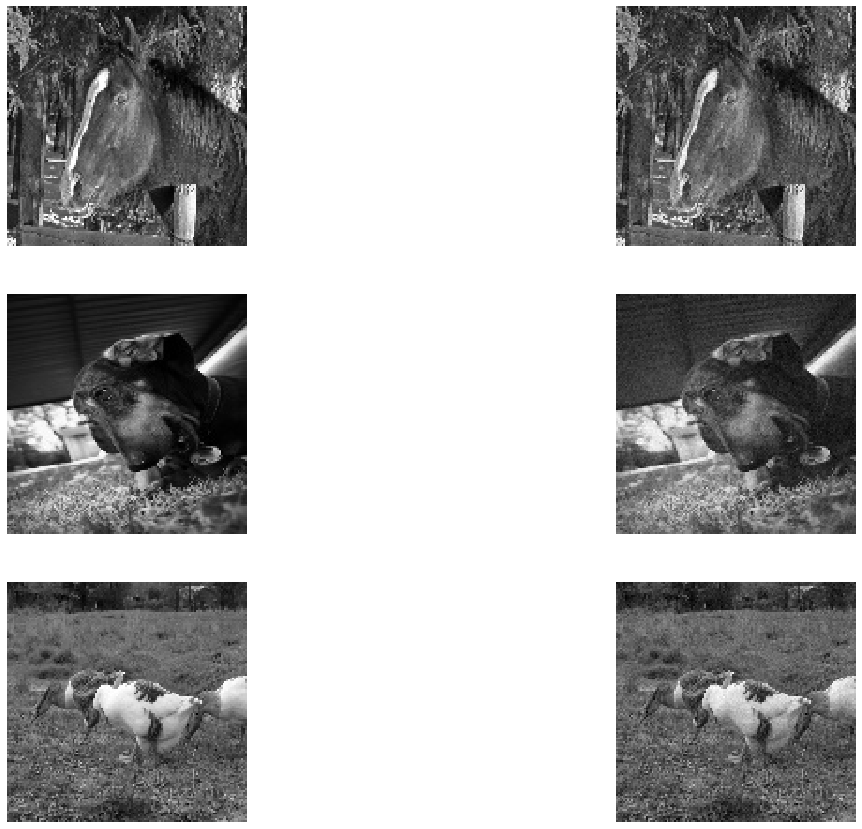

In [26]:
if __name__ == '__main__':
    N_show = 3

    plt.figure(figsize = (10*2,5*N_show))
    for i in range(N_show):
        plt.subplot(N_show,2,2*i+1)
        plt.imshow(ims[i].squeeze(),cmap='gray')
        plt.axis('off')

        plt.subplot(N_show,2,2*i+2)
        plt.imshow(ims_noise[i].squeeze(),cmap='gray')
        plt.axis('off')
    plt.show()

# DnCNN data